# Week-1

# Linear Regression Example using tensorflow
Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.


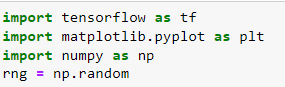

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
rng=np.random

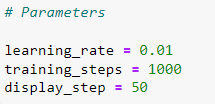

In [2]:
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [3]:
# Just run the next cell using 'Ctrl' + 'Enter'

In [4]:
# Training Data.

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])

Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = X.shape[0]

In [5]:
print(X, '\n', X.shape)

[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ] 
 (17,)


In [6]:
print(Y, '\n', Y.shape)

[1.7   2.76  2.09  3.19  1.694 1.573 3.366 2.596 2.53  1.221 2.827 3.465
 1.65  2.904 2.42  2.94  1.3  ] 
 (17,)


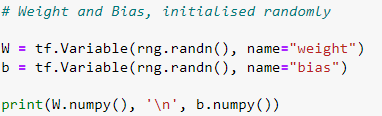

In [7]:
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name = 'bias')#

print(W.numpy(), '\n', b.numpy())

-1.0358067 
 -1.6445688


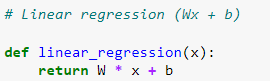

In [8]:
def linear_regression(x):
    return W *x + b

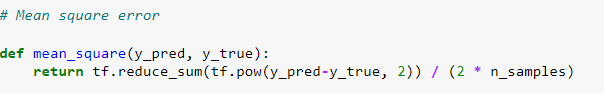

In [9]:
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

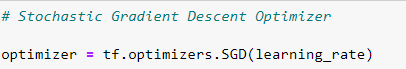

In [10]:
optimizer = tf.optimizers.SGD(learning_rate)

In [11]:
# Adding a question mark () after the function name lets you view the latest documentation. 
# This is a handy tool.

In [12]:
tf.optimizers.SGD?

Init signature:
tf.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='SGD',
    **kwargs,
)
Docstring:     
Gradient descent (with momentum) optimizer.

Update rule for parameter `w` with gradient `g` when `momentum` is 0:

```python
w = w - learning_rate * g
```

Update rule when `momentum` is larger than 0:

```python
velocity = momentum * velocity - learning_rate * g
w = w + velocity
```

When `nesterov=True`, this rule becomes:

```python
velocity = momentum * velocity - learning_rate * g
w = w + momentum * velocity - learning_rate * g
```

Args:
    learning_rate: A `Tensor`, floating point value, or a schedule that is a
        `keras.optimizers.schedules.LearningRateSchedule`, or a callable
        that takes no arguments and returns the actual value to use. T

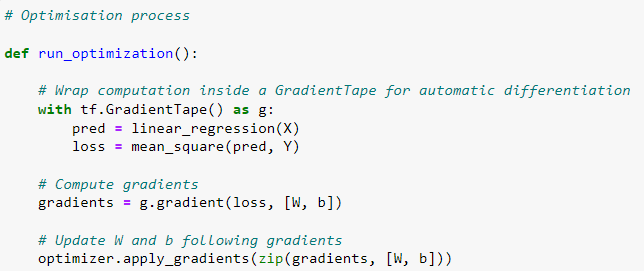

In [13]:
def run_optimization():
    
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        
    gradients = g.gradient(loss, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))

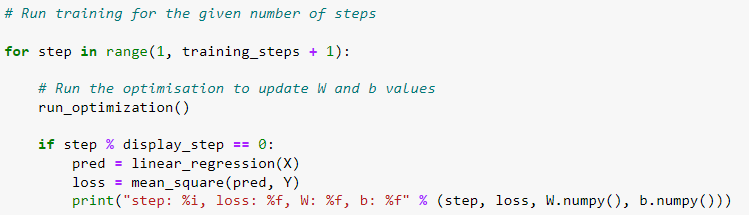

In [14]:
for step in range(1, training_steps + 1):
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print('step: %i, loss: %f, W: %f, b: %f' % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.346530, W: 0.546010, b: -1.288183
step: 100, loss: 0.315695, W: 0.528665, b: -1.165216
step: 150, loss: 0.288387, W: 0.512342, b: -1.049493
step: 200, loss: 0.264203, W: 0.496981, b: -0.940590
step: 250, loss: 0.242784, W: 0.482525, b: -0.838103
step: 300, loss: 0.223815, W: 0.468920, b: -0.741655
step: 350, loss: 0.207016, W: 0.456118, b: -0.650889
step: 400, loss: 0.192138, W: 0.444069, b: -0.565472
step: 450, loss: 0.178961, W: 0.432731, b: -0.485088
step: 500, loss: 0.167292, W: 0.422060, b: -0.409439
step: 550, loss: 0.156957, W: 0.412019, b: -0.338249
step: 600, loss: 0.147804, W: 0.402569, b: -0.271252
step: 650, loss: 0.139698, W: 0.393676, b: -0.208204
step: 700, loss: 0.132519, W: 0.385306, b: -0.148870
step: 750, loss: 0.126161, W: 0.377430, b: -0.093032
step: 800, loss: 0.120530, W: 0.370018, b: -0.040484
step: 850, loss: 0.115544, W: 0.363043, b: 0.008968
step: 900, loss: 0.111127, W: 0.356479, b: 0.055505
step: 950, loss: 0.107216, W: 0.350301, b: 0.0993

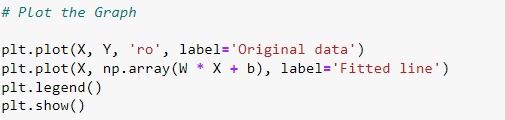

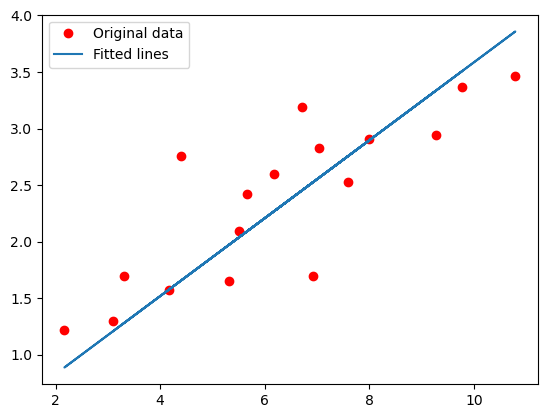

In [15]:
plt.plot(X, Y, 'ro', label = 'Original data')
plt.plot(X, np.array(W * X + b), label = 'Fitted lines')
plt.legend()
plt.show()

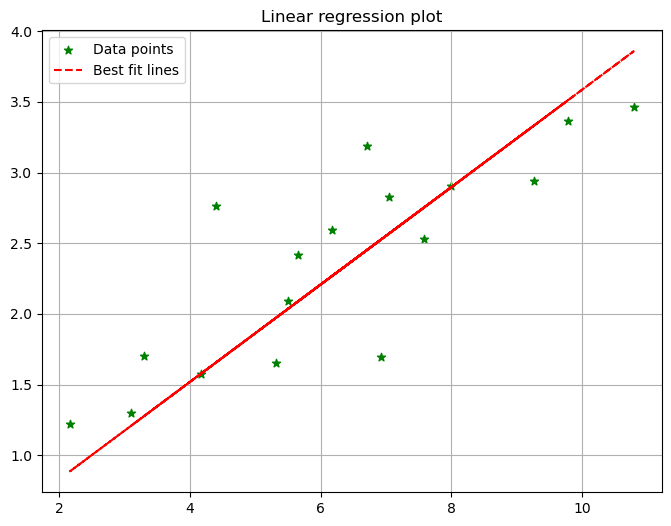

In [54]:
plt.figure(figsize = (8, 6))

plt.scatter(X, Y, color = 'green', marker = '*')
plt.plot(X, np.array(W*X + b), linestyle = 'dashed', color = 'red')

plt.legend(['Data points', 'Best fit lines'])
plt.grid()

plt.title('Linear regression plot')
plt.savefig('Week_1\LinReg.png')
plt.show()

# Lab Logbook requirements: 
### Please make sure to document the following in your Lablogbook:

Include an image of the generated graph depicting the original data and the fitted line for linear regression. Modify the appearance of the graph by adjusting its color or size. Copy the figure and paste it directly into your logbook. Refrain from taking a snapshot; instead, right-click and copy the graph to your lab logbook. Ensure that no code or other information is added to the logbook and that only required graph is present.  

#### Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.